<a href="https://colab.research.google.com/github/aniket-nikam28/Sales_Performance_Analysis/blob/main/SalesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Global Dynamics Corp. USA Sales Performance Analysis (2021-2025)***


**Project Summary:**
Global Dynamics Corp. USA Sales Performance Analysis (2021-2025)
This comprehensive Exploratory Data Analysis (EDA) project delves into Global Dynamics Corp. USA Sales Performance within the USA market from 2021 to 2025. The analysis encompasses a meticulous examination of the dataset to unearth critical insights into revenue and profit drivers, market dynamics, and customer behavior.

**Key analytical phases included:**

-Data Profiling and Cleansing: Rigorous schema verification, strategic handling of missing budget allocations, and precise data type corrections to ensure data integrity and reliability.

-Univariate and Bivariate Analysis: In-depth exploration of key financial distributions (e.g., revenue, profit margin, unit price), detailed breakdowns by product categories, sales channels, and geographical regions, alongside an examination of various customer segments.

-Trend and Seasonality Analysis: Comprehensive charting of monthly and yearly sales patterns to identify recurring seasonal surges, dips, and overarching growth trajectories.

-Outlier Detection: Identification and investigation of anomalous transactions at the extremes of both revenue and unit-price distributions to highlight potential data entry errors or unique business events.

-Correlation and Segmentation: Assessment of interrelationships between critical sales metrics and the application of customer clustering techniques, specifically by revenue versus profit margin, to identify distinct customer segments.







**Problem Statement**

To conduct a thorough analysis of Global Dynamics Corp. USA Sales  data to pinpoint the primary drivers of revenue and profit across its diverse product portfolio, sales channels, and operational regions. This initiative aims to reveal significant seasonal trends, identify high-impact outliers, and evaluate sales performance against established budgets. The derived insights will serve as a strategic foundation for optimizing pricing structures, refining promotional strategies, and guiding market expansion efforts, ultimately fostering sustainable growth and mitigating concentration risk within the business.




In [ ]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [ ]:
file_path = "/content/Regional Sales Dataset.xlsx"
sheets = pd.read_excel(file_path, sheet_name=None)

In [ ]:
df_sales       = sheets['Sales Orders']
df_customers   = sheets['Customers']
df_products    = sheets['Products']
df_regions     = sheets['Regions']
df_state_reg   = sheets['State Regions']
df_budgets     = sheets['2017 Budgets']

In [ ]:
print(f"df_sales      shape: {df_sales.shape}   ")
print(f"df_customers  shape: {df_customers.shape} ")
print(f"df_products   shape: {df_products.shape}   ")
print(f"df_regions    shape: {df_regions.shape}  ")
print(f"df_state_reg  shape: {df_state_reg.shape}")
print(f"df_budgets    shape: {df_budgets.shape}")

df_sales      shape: (64068, 12)   
df_customers  shape: (175, 2) 
df_products   shape: (30, 2)   
df_regions    shape: (994, 15)  
df_state_reg  shape: (49, 3)
df_budgets    shape: (30, 2)


In [ ]:
df_sales.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2021-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2021-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2021-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2021-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2021-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [ ]:

new_header        = df_state_reg.iloc[0]
df_state_reg.columns = new_header
df_state_reg       = df_state_reg[1:].reset_index(drop=True)

In [ ]:
df_state_reg.head()

,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


In [ ]:
df_sales.isnull().sum()

,0
OrderNumber,0
OrderDate,0
Customer Name Index,0
Channel,0
Currency Code,0
Warehouse Code,0
Delivery Region Index,0
Product Description Index,0
Order Quantity,0
Unit Price,0


In [ ]:
df_customers.isnull().sum()

,0
Customer Index,0
Customer Names,0


In [ ]:
df_products.isnull().sum()

,0
Index,0
Product Name,0


In [ ]:
df_regions.isnull().sum()

,0
id,0
name,0
county,0
state_code,0
state,0
type,0
latitude,0
longitude,0
area_code,0
population,0


In [ ]:
df_state_reg.isnull().sum()

,0
0,
State Code,0
State,0
Region,0


In [ ]:
df_budgets.isnull().sum()

,0
Product Name,0
2017 Budgets,0


In [ ]:
len(df_sales) == len(df_sales.drop_duplicates())

True

In [ ]:
df = df_sales.merge(
    df_customers,
    how="left",
    left_on="Customer Name Index",
    right_on="Customer Index"
)



In [ ]:
df = df.merge(
    df_products,
    how='left',
    left_on='Product Description Index',
    right_on='Index'
)

In [ ]:
df = df.merge(
    df_regions,
    how='left',
    left_on='Delivery Region Index',
    right_on='id'
)

In [ ]:
df = df.merge(
    df_state_reg[["State Code","Region"]],
    how='left',
    left_on='state_code',
    right_on='State Code'
)


In [ ]:
df = df.merge(
    df_budgets,
    how='left',
    on='Product Name'
)

In [ ]:
df.to_csv("sales_data.csv", index=False)

In [ ]:
cols_to_drop = [
    'Customer Index', 'Index', 'id', 'State Code',

]
df = df.drop(columns=cols_to_drop, errors='ignore')

df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,Region,2017 Budgets
0,SO - 000225,2021-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,964940.231
1,SO - 0003378,2021-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,2067108.120
2,SO - 0005126,2021-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West,5685138.270
3,SO - 0005614,2021-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,889737.555
4,SO - 0005781,2021-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast,1085037.329


In [ ]:
df.columns = df.columns.str.lower()

In [ ]:
df.columns.values

array(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer names', 'product name',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households',
       'median_income', 'land_area', 'water_area', 'time_zone', 'region',
       '2017 budgets'], dtype=object)

In [ ]:
cols_to_keep = [
    'ordernumber',
    'orderdate',
    'customer names',
    'channel',
    'product name',
    'order quantity',
    'unit price',
    'line total',
    'total unit cost',
    'state_code',
    'state',
    'region',
    'latitude',
    'longitude',
    '2017 budgets'
]


df = df[cols_to_keep]


df = df.rename(columns={
    'ordernumber'      : 'order_number',
    'orderdate'        : 'order_date',
    'customer names'   : 'customer_name',
    'product name'     : 'product_name',
    'order quantity'   : 'quantity',
    'unit price'       : 'unit_price',
    'line total'       : 'revenue',
    'total unit cost'  : 'cost',
    'state_code'       : 'state',
    'state'            : 'state_name',
    'region'           : 'us_region',
    'latitude'         : 'lat',
    'longitude'        : 'lon',
    '2017 budgets'     : 'budget'
})


df.head()

,order_number,order_date,customer_name,channel,product_name,quantity,unit_price,revenue,cost,state,state_name,us_region,lat,lon,budget
0,SO - 000225,2021-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Georgia,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2021-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Indiana,Midwest,39.61366,-86.10665,2067108.120
2,SO - 0005126,2021-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,California,West,37.66243,-121.87468,5685138.270
3,SO - 0005614,2021-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Indiana,Midwest,39.16533,-86.52639,889737.555
4,SO - 0005781,2021-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Connecticut,Northeast,41.77524,-72.52443,1085037.329


In [ ]:
df['order_date'] = df['order_date'].astype('datetime64[ns]')

In [ ]:

df.loc[df['order_date'].dt.year != 2024, 'budget'] = pd.NA


df[['order_date','product_name','revenue','budget']].head(10)


,order_date,product_name,revenue,budget
0,2021-01-01,Product 27,14994.6,NaN
1,2021-01-01,Product 20,25868.7,NaN
2,2021-01-01,Product 26,5869.2,NaN
3,2021-01-01,Product 7,16368.1,NaN
4,2021-01-01,Product 8,18331.2,NaN
5,2021-01-01,Product 23,57412.3,NaN
6,2021-01-01,Product 1,20120.1,NaN
7,2021-01-01,Product 25,10452.0,NaN
8,2021-01-01,Product 13,19262.5,NaN
9,2021-01-01,Product 14,34974.0,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64068 entries, 0 to 64067
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_number   64068 non-null  object        
 1   order_date     64068 non-null  datetime64[ns]
 2   customer_name  64068 non-null  object        
 3   channel        64068 non-null  object        
 4   product_name   64068 non-null  object        
 5   quantity       64068 non-null  int64         
 6   unit_price     64068 non-null  float64       
 7   revenue        64068 non-null  float64       
 8   cost           64068 non-null  float64       
 9   state          64068 non-null  object        
 10  state_name     64068 non-null  object        
 11  us_region      64068 non-null  object        
 12  lat            64068 non-null  float64       
 13  lon            64068 non-null  float64       
 14  budget         15263 non-null  float64       
dtypes: datetime64[ns](1

In [ ]:
df.isnull().sum()

,0
order_number,0
order_date,0
customer_name,0
channel,0
product_name,0
quantity,0
unit_price,0
revenue,0
cost,0
state,0


In [ ]:
df['total_cost'] = df['quantity'] * df['cost']

In [ ]:
df['profit'] = df['revenue'] - df['total_cost']

In [ ]:
df['profit_margin_pct'] = (df['profit'] / df['revenue']) * 100

df['order_month_name'] = df['order_date'].dt.month_name()

df['order_month_num'] = df['order_date'].dt.month



In [ ]:
df

,order_number,order_date,customer_name,channel,product_name,quantity,unit_price,revenue,cost,state,state_name,us_region,lat,lon,budget,total_cost,profit,profit_margin_pct,order_month_name,order_month_num
0,SO - 000225,2021-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Georgia,South,32.08354,-81.09983,NaN,10946.058,4048.542,27.0,January,1
1,SO - 0003378,2021-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Indiana,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,46.0,January,1
2,SO - 0005126,2021-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,California,West,37.66243,-121.87468,NaN,4108.440,1760.760,30.0,January,1
3,SO - 0005614,2021-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Indiana,Midwest,39.16533,-86.52639,NaN,7201.964,9166.136,56.0,January,1
4,SO - 0005781,2021-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Connecticut,Northeast,41.77524,-72.52443,NaN,10082.160,8249.040,45.0,January,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64063,SO - 0007573,2025-02-28,Dazzlesphe Corp,Wholesale,Product 26,12,1815.7,21788.4,980.478,PA,Pennsylvania,Northeast,40.15511,-74.82877,NaN,11765.736,10022.664,46.0,February,2
64064,SO - 0007706,2025-02-28,Yombu Corp,Export,Product 21,6,864.3,5185.8,579.081,IL,Illinois,Midwest,42.11030,-88.03424,NaN,3474.486,1711.314,33.0,February,2
64065,SO - 0007718,2025-02-28,Bath Group,Distributor,Product 13,11,3953.0,43483.0,2648.510,FL,Florida,South,26.24453,-80.20644,NaN,29133.610,14349.390,33.0,February,2
64066,SO - 0008084,2025-02-28,Linklinks Ltd,Distributor,Product 20,7,3959.7,27717.9,2930.178,NY,New York,Northeast,42.91002,-78.74182,NaN,20511.246,7206.654,26.0,February,2


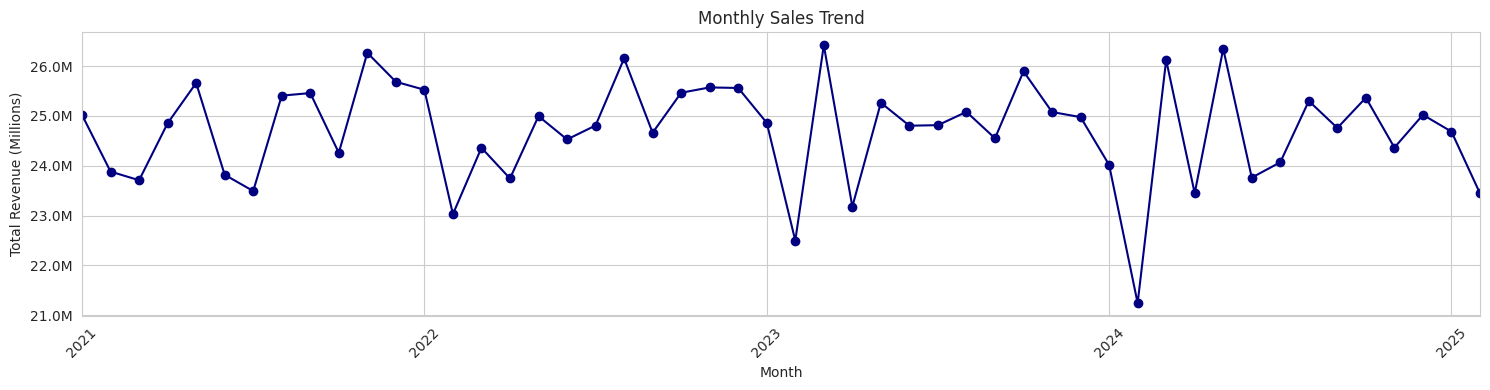

In [ ]:
df['order_month'] = df['order_date'].dt.to_period('M')


monthly_sales = df.groupby('order_month')['revenue'].sum()


plt.figure(figsize=(15,4))


monthly_sales.plot(marker='o', color='navy')


from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)


plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions)')


plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

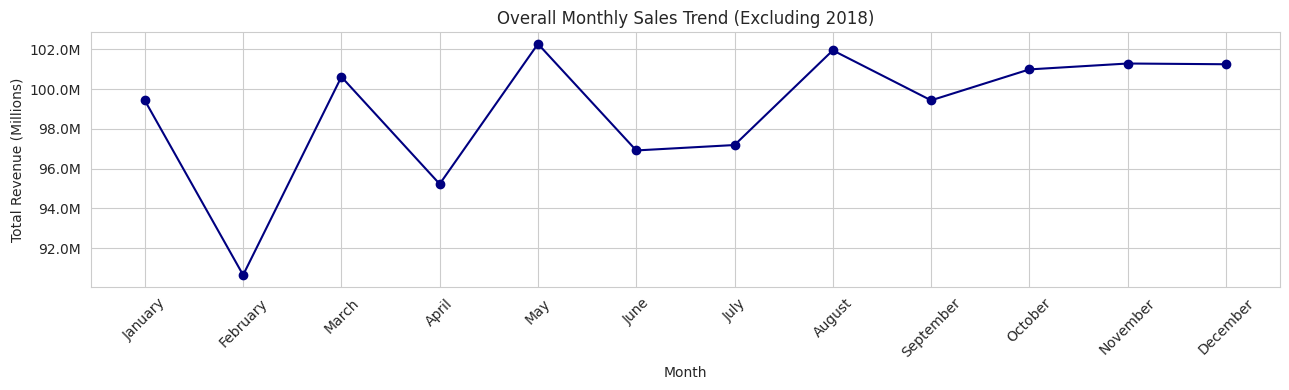

In [ ]:
df_ = df[df['order_date'].dt.year != 2025]




monthly_sales = (
    df_
    .groupby(['order_month_num', 'order_month_name'])['revenue']
    .sum()
    .sort_index()
)


from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(13, 4))
plt.plot(
    monthly_sales.index.get_level_values(1),
    monthly_sales.values,
    marker='o',
    color='navy'
)


formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)


plt.title('Overall Monthly Sales Trend (Excluding 2018)')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions)')


plt.xticks(rotation=45)


plt.tight_layout()


plt.show()


/tmp/ipython-input-35-4198110540.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


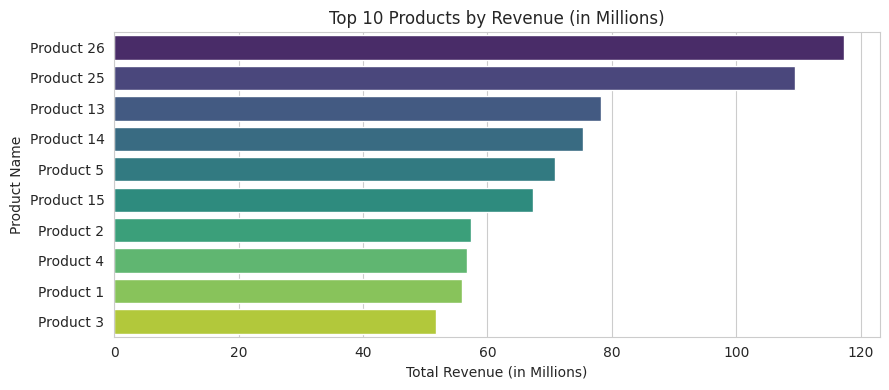

In [ ]:

top_prod = df.groupby('product_name')['revenue'].sum() / 1_000_000


top_prod = top_prod.nlargest(10)


plt.figure(figsize=(9, 4))


sns.barplot(
    x=top_prod.values,
    y=top_prod.index,
    palette='viridis'
)


plt.title('Top 10 Products by Revenue (in Millions)')
plt.xlabel('Total Revenue (in Millions)')
plt.ylabel('Product Name')


plt.tight_layout()


plt.show()

/tmp/ipython-input-36-2924051603.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


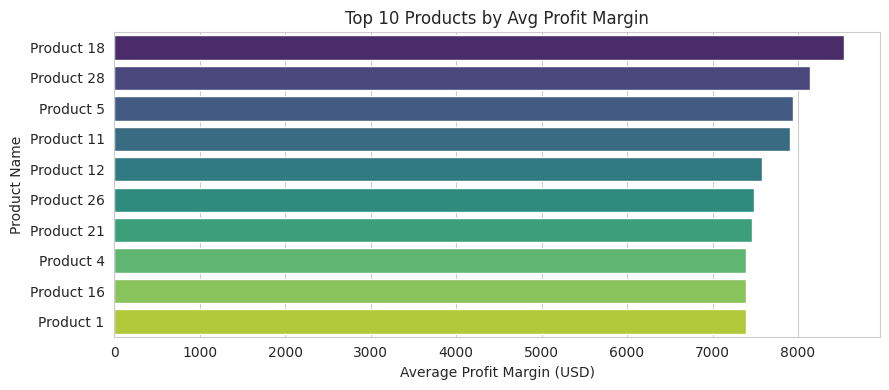

In [ ]:


top_margin = (
    df.groupby('product_name')['profit']
      .mean()
      .sort_values(ascending=False)
      .head(10)
)


plt.figure(figsize=(9, 4))


sns.barplot(
    x=top_margin.values,
    y=top_margin.index,
    palette='viridis'
)


plt.title('Top 10 Products by Avg Profit Margin')
plt.xlabel('Average Profit Margin (USD)')
plt.ylabel('Product Name')

plt.tight_layout()
plt.show()

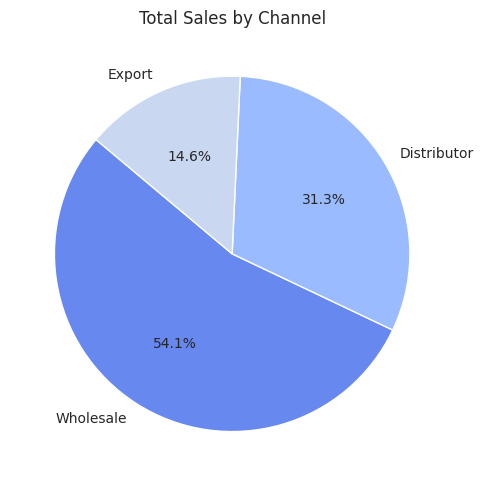

In [ ]:


chan_sales = df.groupby('channel')['revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(5, 5))


plt.pie(
    chan_sales.values,
    labels=chan_sales.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('coolwarm')
)

plt.title('Total Sales by Channel')

plt.tight_layout()

plt.show()

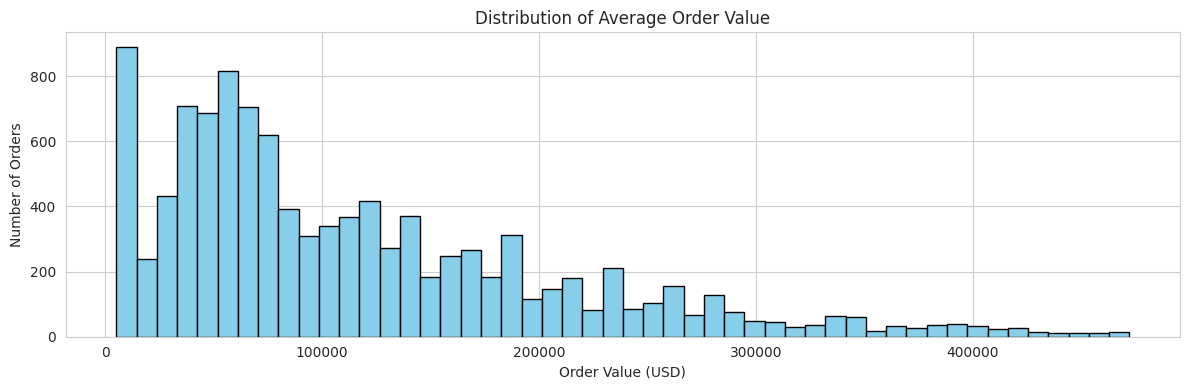

In [ ]:

aov = df.groupby('order_number')['revenue'].sum()


plt.figure(figsize=(12, 4))


plt.hist(
    aov,
    bins=50,
    color='skyblue',
    edgecolor='black'
)


plt.title('Distribution of Average Order Value')
plt.xlabel('Order Value (USD)')
plt.ylabel('Number of Orders')

plt.tight_layout()

plt.show()


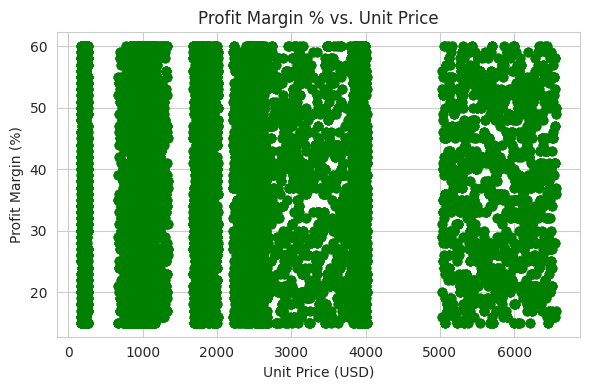

In [ ]:


df['profit_margin_pct'] = (df['profit'] / df['revenue']) * 100


plt.figure(figsize=(6,4))


plt.scatter(
    df['unit_price'],
    df['profit_margin_pct'],
    alpha=0.6,
    color='green'
)
plt.title('Profit Margin % vs. Unit Price')
plt.xlabel('Unit Price (USD)')
plt.ylabel('Profit Margin (%)')


plt.tight_layout()


plt.show()

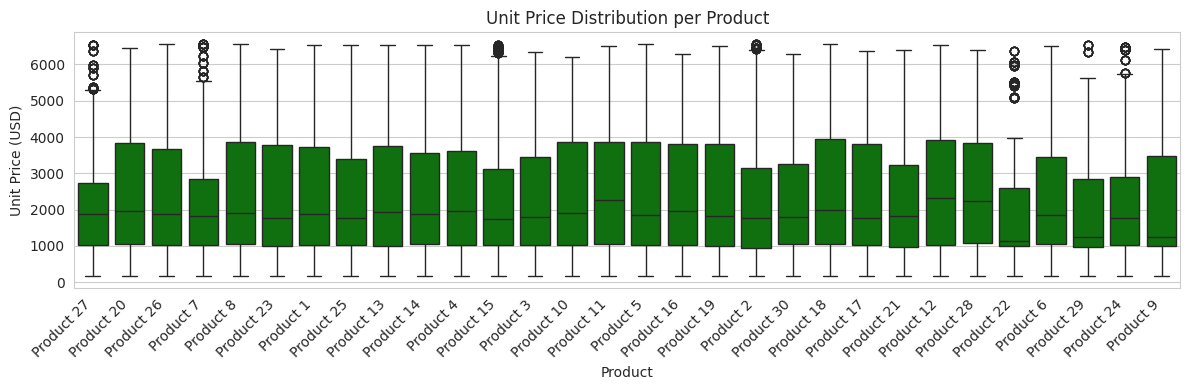

In [ ]:

plt.figure(figsize=(12,4))
sns.boxplot(
    data=df,
    x='product_name',
    y='unit_price',
    color='g'
)

plt.title('Unit Price Distribution per Product')
plt.xlabel('Product')
plt.ylabel('Unit Price (USD)')


plt.xticks(rotation=45, ha='right')


plt.tight_layout()


plt.show()


/tmp/ipython-input-41-1476701091.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


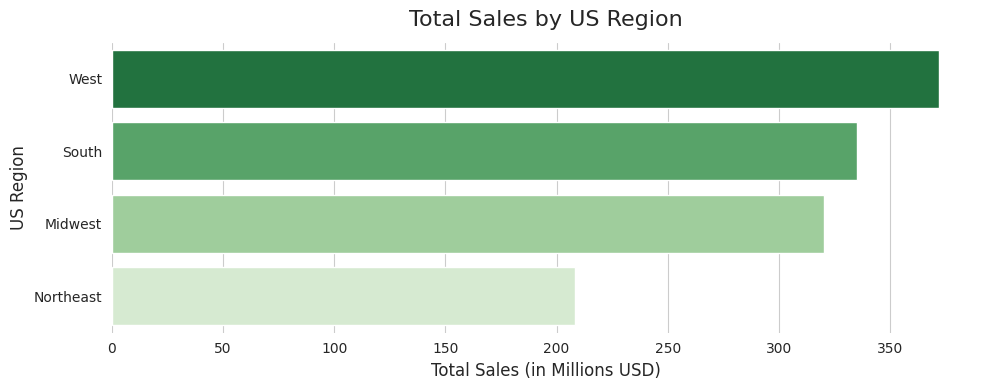

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns


region_sales = (
    df
    .groupby('us_region')['revenue']
    .sum()
    .sort_values(ascending=False)
    / 1e6
)


plt.figure(figsize=(10, 4))
sns.barplot(
    x=region_sales.values,
    y=region_sales.index,
    palette='Greens_r'
)


plt.title('Total Sales by US Region', fontsize=16, pad=12)
plt.xlabel('Total Sales (in Millions USD)', fontsize=12)
plt.ylabel('US Region', fontsize=12)
plt.xticks(rotation=0)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

In [ ]:
import plotly.express as px


state_sales = (
    df
    .groupby('state')['revenue']
    .sum()
    .reset_index()
)
state_sales['revenue_m'] = state_sales['revenue'] / 1e6


fig = px.choropleth(
    state_sales,
    locations='state',
    locationmode='USA-states',
    color='revenue_m',
    scope='usa',
    labels={'revenue_m':'Total Sales (M USD)'},
    color_continuous_scale='Blues',
    hover_data={'revenue_m':':.2f'}
)

fig.update_layout(
    title_text='Total Sales by State',
    margin=dict(l=0, r=0, t=40, b=0),
    coloraxis_colorbar=dict(
        title='Sales (M USD)',
        ticksuffix='M'
    )
)

fig.show()

/tmp/ipython-input-43-4289601977.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




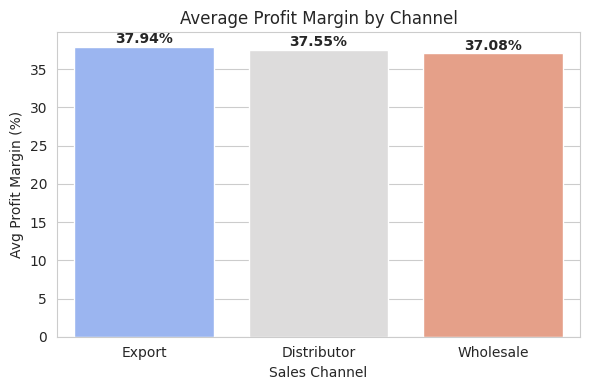

In [ ]:
channel_margin = (
    df.groupby('channel')['profit_margin_pct']
      .mean()
      .sort_values(ascending=False)
)


plt.figure(figsize=(6, 4))


ax = sns.barplot(
    x=channel_margin.index,
    y=channel_margin.values,
    palette='coolwarm'
)


plt.title('Average Profit Margin by Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Avg Profit Margin (%)')


for i, v in enumerate(channel_margin.values):
    ax.text(
        i,
        v + 0.5,
        f"{v:.2f}%",
        ha='center',
        fontweight='bold'
    )


plt.tight_layout()
plt.show()

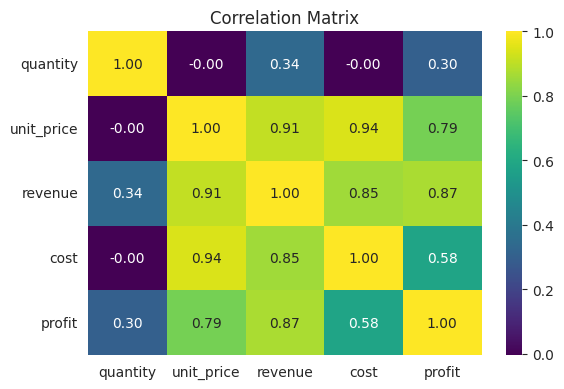

In [ ]:

num_cols = ['quantity', 'unit_price', 'revenue', 'cost', 'profit']
corr = df[num_cols].corr()


plt.figure(figsize=(6,4))


sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap='viridis'
)


plt.title('Correlation Matrix')


plt.tight_layout()


plt.show()

In [ ]:
df

,order_number,order_date,customer_name,channel,product_name,quantity,unit_price,revenue,cost,state,...,us_region,lat,lon,budget,total_cost,profit,profit_margin_pct,order_month_name,order_month_num,order_month
0,SO - 000225,2021-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,...,South,32.08354,-81.09983,NaN,10946.058,4048.542,27.0,January,1,2021-01
1,SO - 0003378,2021-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,...,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,46.0,January,1,2021-01
2,SO - 0005126,2021-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,...,West,37.66243,-121.87468,NaN,4108.440,1760.760,30.0,January,1,2021-01
3,SO - 0005614,2021-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,...,Midwest,39.16533,-86.52639,NaN,7201.964,9166.136,56.0,January,1,2021-01
4,SO - 0005781,2021-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,...,Northeast,41.77524,-72.52443,NaN,10082.160,8249.040,45.0,January,1,2021-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64063,SO - 0007573,2025-02-28,Dazzlesphe Corp,Wholesale,Product 26,12,1815.7,21788.4,980.478,PA,...,Northeast,40.15511,-74.82877,NaN,11765.736,10022.664,46.0,February,2,2025-02
64064,SO - 0007706,2025-02-28,Yombu Corp,Export,Product 21,6,864.3,5185.8,579.081,IL,...,Midwest,42.11030,-88.03424,NaN,3474.486,1711.314,33.0,February,2,2025-02
64065,SO - 0007718,2025-02-28,Bath Group,Distributor,Product 13,11,3953.0,43483.0,2648.510,FL,...,South,26.24453,-80.20644,NaN,29133.610,14349.390,33.0,February,2,2025-02
64066,SO - 0008084,2025-02-28,Linklinks Ltd,Distributor,Product 20,7,3959.7,27717.9,2930.178,NY,...,Northeast,42.91002,-78.74182,NaN,20511.246,7206.654,26.0,February,2,2025-02


In [ ]:
df.to_csv('Sales_data(After EDA).csv', index=False)

**🔍 Key Insights**


Monthly Revenue Cycle:
Revenue stays stable between ≈
26.5M across 2021–2024, with no consistent seasonal spikes. Sharpest drop (≈$21.2M) occurs in early 2017, indicating a possible one-time disruption.

Channel Mix:
Wholesale: 54%. Distributors: 31%. Exports: 15% — opportunity to scale international presence.

Top Products (Revenue):
Product 26:
110M; Product 13:
68–75M; bottom performers: $52–57M.

Profit Margins:
Profit margins range broadly from ≈18% to ≈60%, with no strong correlation to unit price. Dense horizontal bands suggest standardized pricing strategies across tiers.

Seasonal Volume:
No strong monthly pattern, but slight volume uptick appears around May–June. Early 2024 dip (≈$21.2M) may require investigation.

Regional Performance:
California leads: ≈230M Revenue & 7500+ orders. Illinois/Florida/Texas: ≈
85M–110M & ≈3500–4500 orders. NY/Indiana: ≈
54M & 2000+ orders.